In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [2]:
print("Initial Data Shape:", df.shape)
print(df.head())
print(df.info())

df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

Initial Data Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [3]:
df.dropna(subset=['Age', 'Embarked'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert categorical columns
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# 5. Cleaned data info
print("\nAfter Cleaning:")
print(df.info())
print("Cleaned Data Shape:", df.shape)


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Survived     712 non-null    int64   
 2   Pclass       712 non-null    category
 3   Sex          712 non-null    category
 4   Age          712 non-null    float64 
 5   SibSp        712 non-null    int64   
 6   Parch        712 non-null    int64   
 7   Fare         712 non-null    float64 
 8   Embarked     712 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 41.4 KB
None
Cleaned Data Shape: (712, 9)



1. Survival Rate by Gender:
Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64


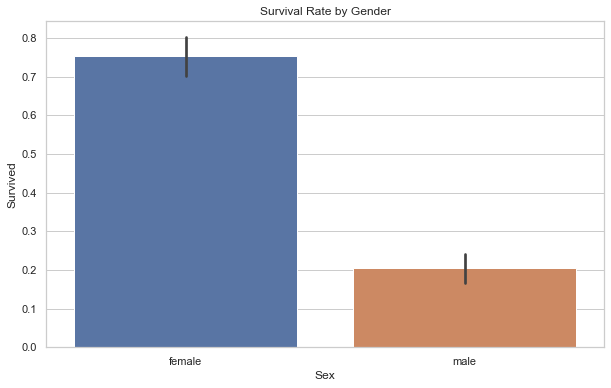


2. Survival Rate by Passenger Class:
Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


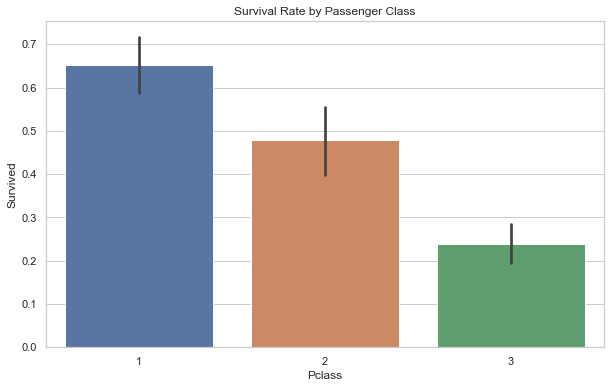


3. Average Age by Class:
Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [4]:
print("\n1. Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

## Insight 2: Survival rate by class
print("\n2. Survival Rate by Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean())

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

## Insight 3: Average age by class
print("\n3. Average Age by Class:")
print(df.groupby('Pclass')['Age'].mean())

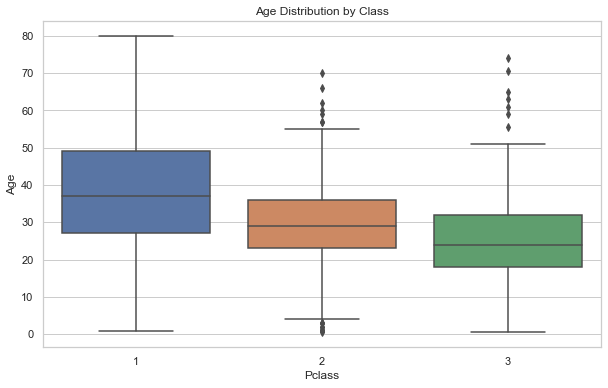


4. Survival Rate by Embarkation Port:
Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64


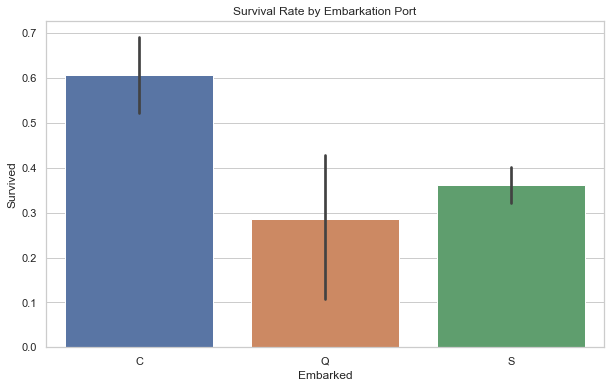

In [5]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.show()

## Insight 4: Survival by Embarked Port
print("\n4. Survival Rate by Embarkation Port:")
print(df.groupby('Embarked')['Survived'].mean())

sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()


5. Age Distribution: Survivors vs Non-Survivors


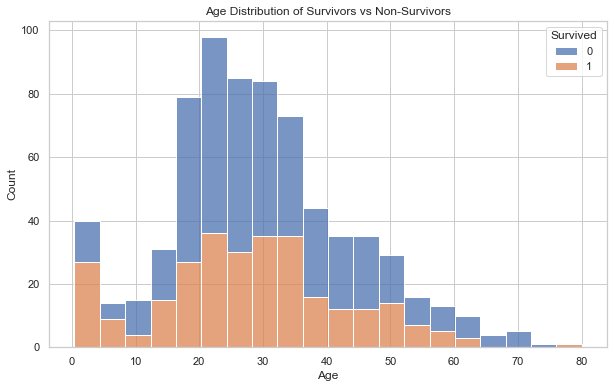

In [6]:
print("\n5. Age Distribution: Survivors vs Non-Survivors")
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()